Oguzhan Berberoglu 24001
CS210 Individual Project

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
import seaborn as sns  # a visualization library based on matplotlib
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")

%matplotlib inline

>>readed file which is our data

In [26]:
info=pd.read_csv("taxi-trips.csv")
info.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695


we defined the number of rows and columns

In [27]:
n_rows, n_columns = info.shape
print("number of rows: {}, number of columns: {}".format(n_rows, n_columns))

number of rows: 118185, number of columns: 11


>>we showed data types of every column

In [28]:
info.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

>>described basic statistical percentile, mean

In [29]:
info.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000
mean,1.534958,1.657148,-73.973971,40.751392,-73.973538,40.752212,927.186310
std,0.498779,1.313844,0.040456,0.027958,0.039192,0.032284,3118.710246
min,1.000000,0.000000,-79.487900,40.225803,-79.487900,40.225800,1.000000
25%,1.000000,1.000000,-73.991875,40.737835,-73.991394,40.736462,393.000000
50%,2.000000,1.000000,-73.981796,40.754501,-73.979759,40.754848,652.000000
75%,2.000000,2.000000,-73.967575,40.768471,-73.962990,40.770077,1048.000000
max,2.000000,6.000000,-73.425018,41.292198,-73.055977,41.292198,86366.000000


>reverse geocoded the pickup latitudes and pick up longitudes
>> and zipped it

In [30]:
import reverse_geocoder as rg
pickup_longitudes = info['pickup_longitude']
pickup_latitudes = info['pickup_latitude']

List_pickup = list(zip(pickup_latitudes,pickup_longitudes))
results_pickup = rg.search(List_pickup)
#print(results_pickup)

>reverse geocoded the dropoff longitude and drop off latitudes 
>>zipped it

In [31]:
dropoff_longitudes = info['dropoff_longitude']
dropoff_latitudes = info['dropoff_latitude']

List_dropoff = list(zip(dropoff_latitudes,dropoff_longitudes))
results_dropoff = rg.search(List_dropoff)
#print(results_dropoff)

>taken names from pick up list
>>and create a new column with it as pickup_district

In [32]:
resultsArrayPickup = []
for i in results_pickup:
    resultsArrayPickup.append(i.get('name'))

info['pickup_district'] = resultsArrayPickup
info.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City


>taken names from drop off list
>>and create a new column with it as dropoff_district

In [33]:
resultsArrayDropoff = []
for i in results_dropoff:
    resultsArrayDropoff.append(i.get('name'))

info['dropoff_district'] = resultsArrayDropoff
info.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City


>found the top 5 pick up districts by using groupby func

In [34]:
top5districts = info.groupby(by='pickup_district')['pickup_district'].count().sort_values(ascending=False)[:5]
print(top5districts)

pickup_district
Manhattan           45329
New York City       34625
Long Island City    17787
Weehawken           11334
The Bronx            2777
Name: pickup_district, dtype: int64


> found the top 5 drop off districts by using groupby func

In [35]:
top5districts_2 = info.groupby(by='dropoff_district')['dropoff_district'].count().sort_values(ascending=False)[:5]
print(top5districts_2)

dropoff_district
Manhattan           44478
New York City       31082
Long Island City    19919
Weehawken           10621
Brooklyn             2059
Name: dropoff_district, dtype: int64


>top 5 pick up districts showed by barh diagram

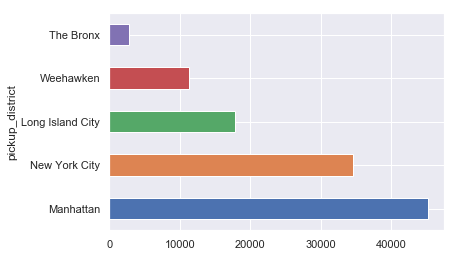

In [36]:
top5districts.plot(kind="barh")

>top 5 drop off districts showed by barh diagram

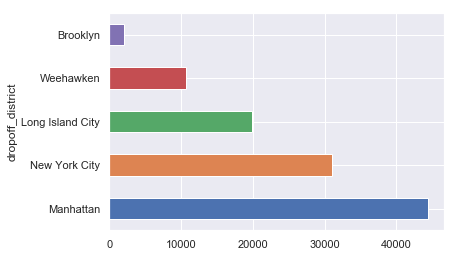

In [37]:
top5districts_2.plot(kind="barh")

>geopy library installed and added

In [38]:
from geopy.distance import geodesic

> by using geodesic function from geopy, created a function that calculates distance

In [39]:
def compute_dist(row):
    return geodesic((row["pickup_latitude"],row["pickup_longitude"]),(row["dropoff_latitude"],row["dropoff_longitude"])).km

> used compute_dist function to calculate distance
>> apply it for every row in our file

In [40]:
info['distance']=info.apply(compute_dist,axis=1)
info.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,1.502172
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,5.114807
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,1.495018
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.976279
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,2.513961


>defined time; 
>> declerated timestamps by using pick up date time column
>>> every row returned their timestamp
>>>> and created new column named time_of_day

In [41]:
def time(row):
    pick_time = row["pickup_datetime"]
    hms = pick_time[-8:]
    
    x = int(hms[:2]) 
    if x >= 0 and x<7:
        return "late_night"
    elif x >= 7 and x < 9:
        return "rush_hour_morning"
    elif x >= 9 and x < 16:
        return "afternoon"
    elif x >= 16 and x < 18:
        return "rush_hour_evening"
    elif x >= 18 and x < 23:
        return "evening"
    elif x >= 23 and x < 24:
        return "late_night"

info['time_of_day'] = info.apply(time, axis=1)  

info.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance,time_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,1.502172,rush_hour_evening
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,5.114807,evening
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,1.495018,rush_hour_morning
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.976279,afternoon
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,2.513961,afternoon


> to show the average distance varies as time of the day changes
>> data collected from time_of_day column and distance column
>>>showed in a diagram

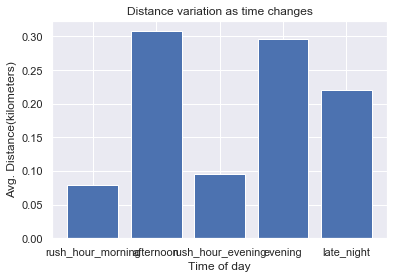

In [42]:
sum = 0.0
rush_morning = 0.0
afternoon = 0.0
rush_evening = 0.0
evening = 0.0
late_night = 0.0

for _, row in info.iterrows():
    x = float(row['distance'])
    variable_name = row["time_of_day"]
    sum += x
    if variable_name == "rush_hour_morning":
        rush_morning += x
    elif variable_name == "afternoon":
        afternoon += x
    elif variable_name == "rush_hour_evening":
        rush_evening += x
    elif variable_name == "evening":
        evening += x
    elif variable_name == "late_night":
        late_night += x

data = {'rush_hour_morning': rush_morning / sum, 'afternoon': afternoon / sum, 'rush_hour_evening': rush_evening / sum, 'evening': evening / sum, 'late_night': late_night / sum}
variable_names = list(data.keys())
values = list(data.values())

plt.bar(variable_names, values)
plt.ylabel("Avg. Distance(kilometers)")
plt.xlabel("Time of day")
plt.title("Distance variation as time changes")
plt.show()

> to show the trip duration varies as time of the day changes
>> data collected from time_of_day column and trip_duration column
>>>showed in a diagram

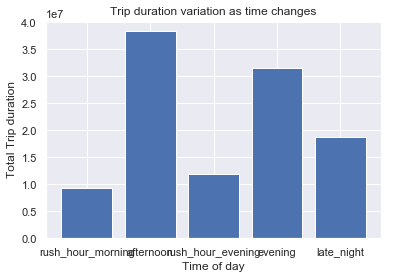

In [43]:
sum = 0.0
rush_morning = 0.0
afternoon = 0.0
rush_evening = 0.0
evening = 0.0
late_night = 0.0
for _, row in info.iterrows():
    x = int(row['trip_duration'])
    variable_name = row["time_of_day"]
    sum += x
    if variable_name == "rush_hour_morning":
        rush_morning += x
    elif variable_name == "afternoon":
        afternoon += x
    elif variable_name == "rush_hour_evening":
        rush_evening += x
    elif variable_name == "evening":
        evening += x
    elif variable_name == "late_night":
        late_night += x

data = {'rush_hour_morning': rush_morning, 'afternoon': afternoon, 'rush_hour_evening': rush_evening, 'evening': evening, 'late_night': late_night}
variable_name = list(data.keys())
value = list(data.values())

plt.bar(variable_name, value)
plt.ylabel("Total Trip duration")
plt.xlabel("Time of day")
plt.title("Trip duration variation as time changes")
plt.show()

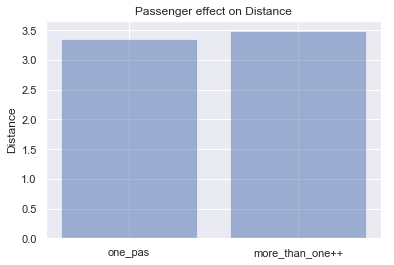

In [44]:
test = "distance"

one_pas = info[info["passenger_count"] == 1][test] 
more_than_one = info[info["passenger_count"] > 1 ][test]    
mean_of_one_pass = one_pas.mean()
mean_of_moreThanOne = more_than_one.mean()

objects = ('one_pas', 'more_than_one++')
y_pos = np.arange(len(objects))
perf = [mean_of_one_pass,mean_of_moreThanOne]
 
plt.bar(y_pos, perf, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Distance')
plt.title('Passenger effect on Distance')

plt.show()

In [45]:
stats.ttest_ind(one_pas, more_than_one, equal_var=False)

Ttest_indResult(statistic=-4.90336211049223, pvalue=9.445117080445828e-07)

If we set the significance level as 0.05, we can reject the Null Hypothesis. In this case, our p value is smaller than 0.05. Therefore, we can say that passenger group size has effect on the distance.

In [46]:
day = pd.to_datetime(info["pickup_datetime"], infer_datetime_format=True)
theDay=day.dt.day_name()
array = []
for i in range (len(info['id'])):
    if theDay[i] == "Sunday":
        Week = "weekend"
    elif theDay[i] == "Saturday":
        Week = "weekend"
    else:
        Week = "weekday"
    array.append(Week)
    
info['DayOfWeek'] = array
print(info['DayOfWeek'])
    

0         weekday
1         weekday
2         weekday
3         weekday
4         weekday
5         weekend
6         weekday
7         weekday
8         weekday
9         weekday
10        weekend
11        weekday
12        weekend
13        weekday
14        weekday
15        weekend
16        weekday
17        weekend
18        weekday
19        weekday
20        weekday
21        weekend
22        weekday
23        weekday
24        weekday
25        weekend
26        weekday
27        weekday
28        weekday
29        weekday
           ...   
118155    weekday
118156    weekday
118157    weekday
118158    weekday
118159    weekend
118160    weekend
118161    weekend
118162    weekday
118163    weekday
118164    weekday
118165    weekend
118166    weekend
118167    weekend
118168    weekday
118169    weekday
118170    weekday
118171    weekday
118172    weekday
118173    weekend
118174    weekday
118175    weekday
118176    weekday
118177    weekend
118178    weekend
118179    

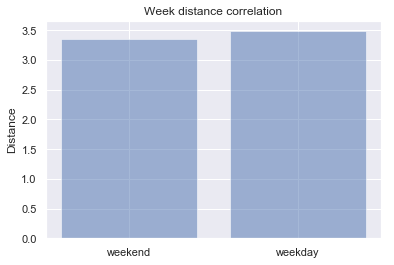

In [47]:
test = "distance"

weekendVariable = info[info["DayOfWeek"] == "weekend"][test] 
weekedayVariable = info[info["DayOfWeek"] == "weekday" ][test]    
weekend = one_pas.mean()
weekday = more_than_one.mean()

objects = ('weekend', 'weekday')
y_pos = np.arange(len(objects))
perf = [weekend,weekday]
 
plt.bar(y_pos, perf, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Distance')
plt.title('Week distance correlation')

plt.show()

In [48]:
stats.ttest_ind(weekendVariable, weekedayVariable, equal_var=False)

Ttest_indResult(statistic=5.604877366928609, pvalue=2.092414433069292e-08)

If we set the significance level as 0.05, we can reject the Null Hypothesis, like we said above test. In this case, our p value is smaller than 0.05. Therefore, we can say that the day of the week has effect on the distance.